# (Example is a work in progress) - Working with Intake

Column(width_policy='max')
    [0] Row(width_policy='max')
        [0] PNG(str)
        [1] Column(width_policy='max')
            [0] Column(name='Select Catalog')
                [0] Markdown(str, max_height=40)
                [1] MultiSelect(min_width=200, options={'builtin': <Intake c...}, size=9, value=[<Intake catalog: b...], width_policy='min')
            [1] Row(name='Controls')
                [0] Toggle(name='＋', value=True, width=50)
                [1] Button(name='―', width=50)
                [2] Toggle(name='🔍', width=50)
        [2] Column(width_policy='max')
            [0] Column(name='Select Data Source')
                [0] Markdown(str, max_height=40)
                [1] MultiSelect(min_width=200, size=9, width_policy='min')
            [1] Row(name='Controls')
                [0] Toggle(disabled=True, name='📊', width=50)
                [1] Toggle(disabled=True, name='⚙', width=50)
        [3] Column(height=240, name='Description', scroll=True, sizing_mode='stretch_width', width_policy='max')
            [0] Markdown(str)
    [1] Row(width_policy='max')
        [0] Row(height_policy='min', max_width=5000, name='Search', width_policy='max')
        [1] Column(max_width=5000, name='Add Catalog', width_policy='max')
            [0] Tabs
                [0] Column(name='Local', width_policy='max')
                    [0] Row
                        [0] Select(name='protocol', options=['abfs', 'adl', ...], value='github')
                        [1] TextInput(name='kwargs', value='{"org": "pangeo-data"}', value_input='{"org": "pangeo-data", ...)
                    [1] Row
                        [0] Button(clicks=1, height=30, name='🏠', sizing_mode='fixed', width=40)
                        [1] Button(height=30, name='‹', sizing_mode='fixed', width=30)
                        [2] TextInput(width_policy='max')
                        [3] Button(clicks=1, name='⇨')
                    [2] MultiSelect(size=15, width_policy='max')
                [1] Row(name='URL', width_policy='max')
                    [0] Markdown(str)
                    [1] TextInput(placeholder='Full URL with protocol', width_policy='max')
            [1] Row
                [0] Button(disabled=True, name='Add Catalog', width_policy='min')
                [1] SVG(None, width=25)
        [2] Column(name='Plot', width_policy='max')
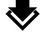

In [2]:
import intake
intake.gui

In [1]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/master.yaml")
list(cat)

['ocean', 'atmosphere', 'climate', 'hydro']

In [2]:
cat

master:
  args:
    path: https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/master.yaml
  description: Pangeo Master Data Catalog
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [5]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/atmosphere.yaml")
ds  = cat["gmet_v1"].to_dask()

ValueError: Bad Request: https://storage.googleapis.com/download/storage/v1/b/pangeo-ncar-gmet/o/.zmetadata?alt=media
User project specified in the request is invalid.

In [6]:
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/atmosphere.yaml")
ds  = cat["gpcp_cdr_daily_v1_3"].to_dask()

ValueError: Bad Request: https://storage.googleapis.com/download/storage/v1/b/pangeo-noaa-esrl-gpcp/o/.zmetadata?alt=media
User project specified in the request is invalid.

In [9]:
import intake
col_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"

In [10]:
col = intake.open_esm_datastore(col_url)

In [11]:
col

,unique
activity_id,17
institution_id,36
source_id,86
experiment_id,168
member_id,650
table_id,37
variable_id,709
grid_label,10
zstore,501656
dcpp_init_year,60
